In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
  
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 


In [25]:
X = pd.read_csv('reduced_df.csv') 

  
# Dropping the CUST_ID column from the data 
  
# Handling the missing values 
X.fillna(method ='ffill', inplace = True) 
  
print(X.head()) 

   Unnamed: 0  BALANCE_FREQUENCY  ONEOFF_PURCHASES  ...  installment  none  one_off
0           0           0.597837          0.000000  ...            1     0        0
1           1           0.646627          0.000000  ...            0     1        0
2           2           0.693147          6.651791  ...            0     0        1
3           3           0.492477          7.313220  ...            0     0        1
4           4           0.693147          2.833213  ...            0     0        1

[5 rows x 18 columns]


In [0]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that  
# the data approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

In [27]:
pca = PCA(n_components = 5) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2','P3','P4','P5'] 
print(X_principal.head()) 

         P1        P2        P3        P4        P5
0  0.056811  0.615722  0.279367 -0.009008  0.259617
1  0.873206 -0.034449 -0.184796  0.268683  0.135682
2 -0.192561 -0.508472  0.506714 -0.379634  0.131159
3  0.314447 -0.366759  0.527698 -0.265992  0.032511
4  0.418327 -0.159671  0.557747 -0.297372  0.373932


In [0]:
db_default = DBSCAN(eps = 0.3575, min_samples = 290).fit(X_principal) 
labels = db_default.labels_


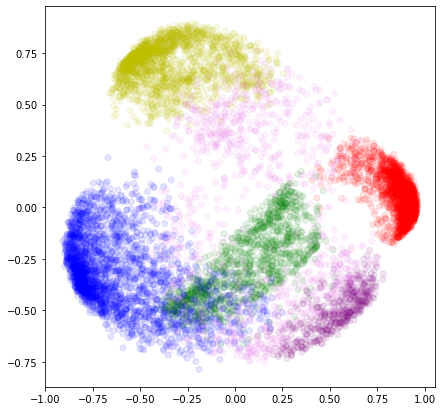

In [29]:
color_map={0:'r',1:'b',2:'g',3:'y',4:'purple',-1:'violet'}
label_color=[color_map[l] for l in labels]
plt.figure(figsize=(7,7))
plt.scatter(x='P1',y='P2',c=label_color,cmap='Spectral',alpha=0.1,data=X_principal)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


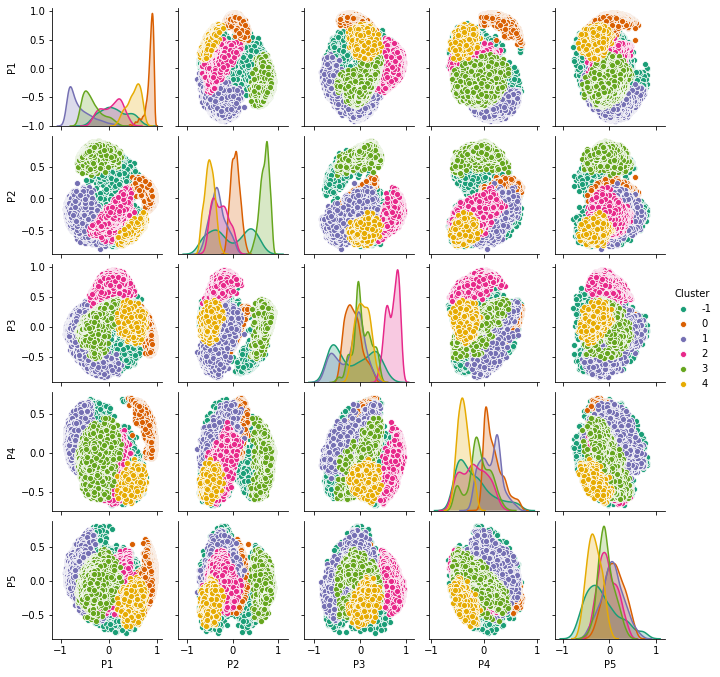

In [30]:
import seaborn as sns
df_pair_plot=pd.DataFrame(X_principal)
df_pair_plot['Cluster']=labels
df_pair_plot.head()
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

In [31]:
from sklearn import metrics
from sklearn.metrics import calinski_harabaz_score,silhouette_score
best_sil_score=silhouette_score(X_principal,labels)
best_cal_score=calinski_harabaz_score(X_principal,labels)
print('Silhouette Score is {}'.format(best_sil_score))
print('Calinski_harabaz Score is {}'.format(best_cal_score))

Silhouette Score is 0.6277172283451069
Calinski_harabaz Score is 19032.123396705774


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


### 4 is the ideal clusternig 

In [0]:

credit=pd.read_csv('credit.csv')
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both_oneoff_installment','installment','one_off','none','CREDIT_LIMIT']
cre_original=pd.concat([credit,pd.get_dummies(credit['purchase_type'])],axis=1)
cr_log=credit.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

cr_pre=cr_log[[x for x in cr_log.columns if x not in col ]] 
cr_pre.describe()
cluster_df_4=pd.concat([cre_original[col_kpi],pd.Series(labels,name='Cluster_4')],axis=1)


In [33]:
print(set(cluster_df_4['Cluster_4']))

{0, 1, 2, 3, 4, -1}


In [34]:
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,-1,0,1,2,3,4
PURCHASES_TRX,9.289579,0.001475,35.209311,7.711452,12.140745,3.894614
Monthly_avg_purchase,54.104774,0.000000,205.569529,77.156024,48.362363,42.060454
Monthly_cash_advance,141.913866,183.105744,67.388728,0.613518,1.601593,249.263096
limit_usage,0.559741,0.568200,0.348125,0.250120,0.176651,0.647336
CASH_ADVANCE_TRX,5.146293,6.317109,2.764867,0.047791,0.048740,9.093677
payment_minpay,34.378652,5.439613,7.352264,6.065803,5.107250,2.014639
both_oneoff_installment,0.218437,0.000000,1.000000,0.000000,0.000000,0.000000
installment,0.434870,0.000000,0.000000,0.000000,1.000000,0.000000
one_off,0.338677,0.000000,0.000000,1.000000,0.000000,1.000000
none,0.008016,1.000000,0.000000,0.000000,0.000000,0.000000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


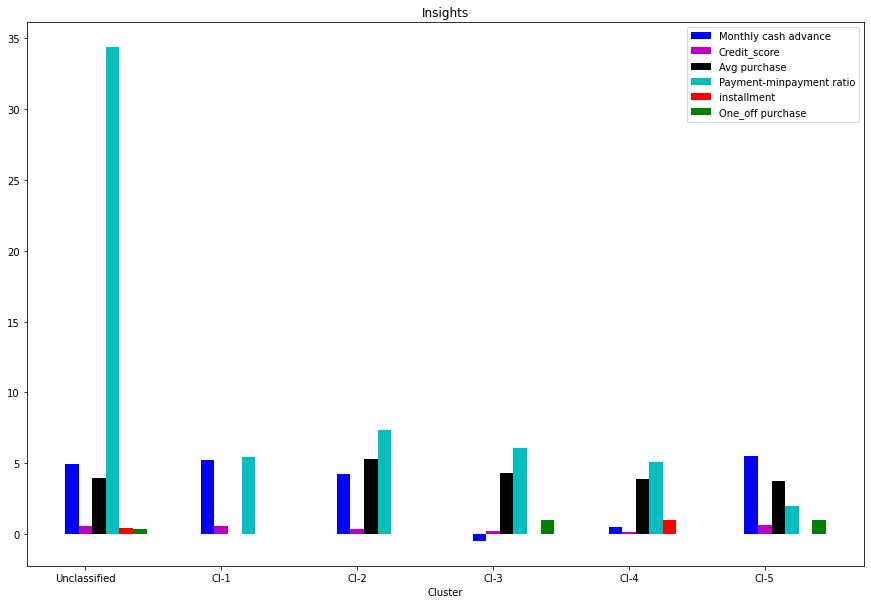

In [35]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['installment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Unclassified', 'Cl-1', 'Cl-2', 'Cl-3', 'Cl-4', 'Cl-5'))
plt.legend()

### Analysing with 5 components 

In [36]:
pca = PCA(n_components = 5) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2','P3','P4','P5'] 
print(X_principal.head()) 

         P1        P2        P3        P4        P5
0  0.056811  0.615722  0.279367 -0.009008  0.259617
1  0.873206 -0.034449 -0.184796  0.268683  0.135682
2 -0.192561 -0.508472  0.506714 -0.379634  0.131159
3  0.314447 -0.366759  0.527698 -0.265992  0.032511
4  0.418327 -0.159671  0.557747 -0.297372  0.373932


In [0]:
db_default = DBSCAN(eps = 0.3750, min_samples = 300).fit(X_principal) 
labels = db_default.labels_


In [38]:
from sklearn import metrics
from sklearn.metrics import calinski_harabaz_score,silhouette_score
best_sil_score=silhouette_score(X_principal,labels)
best_cal_score=calinski_harabaz_score(X_principal,labels)
print('Silhouette Score is {}'.format(best_sil_score))
print('Calinski_harabaz Score is {}'.format(best_cal_score))

Silhouette Score is 0.43544549032471097
Calinski_harabaz Score is 4533.4689590368125


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


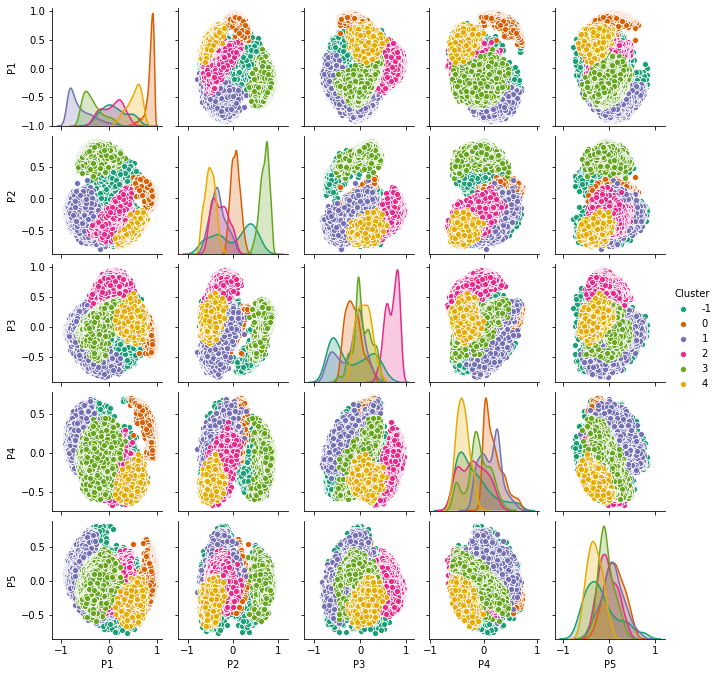

In [39]:
import seaborn as sns
df_pair_plot=pd.DataFrame(X_principal)
df_pair_plot['Cluster']=labels
df_pair_plot.head()
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

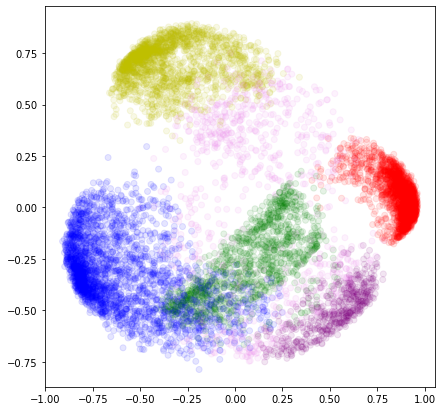

In [40]:
color_map={0:'r',1:'b',2:'g',3:'y',4:'purple',-1:'violet'}
label_color=[color_map[l] for l in labels]
plt.figure(figsize=(7,7))
plt.scatter(x='P1',y='P2',c=label_color,cmap='Spectral',alpha=0.1,data=X_principal)

In [41]:
score={}
score_c={}
vec=[0.3575,0.3225,0.4350,0.4075,0.3680,0.3925,0.4150]
for n in vec:
    db = DBSCAN(eps = n, min_samples = 300).fit(X_principal)
    labels1 = db.labels_ 
    score_c[n]=calinski_harabaz_score(X_principal,db.labels_)
    score[n]=silhouette_score(X_principal,db.labels_)
    

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz

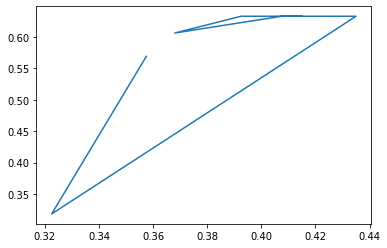

In [42]:
pd.Series(score).plot()

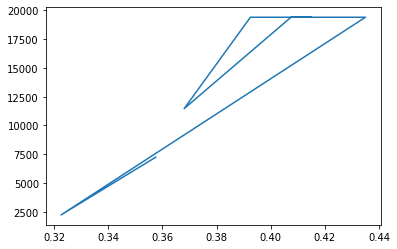

In [43]:
pd.Series(score_c).plot()

In [44]:
score={}
score_c={}
for n in range(200,400,25):
    db = DBSCAN(eps = 0.3750, min_samples = n).fit(X_principal)
    labels1 = db.labels_ 
    score_c[n]=calinski_harabaz_score(X_principal,db.labels_)
    score[n]=silhouette_score(X_principal,db.labels_)
    

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz

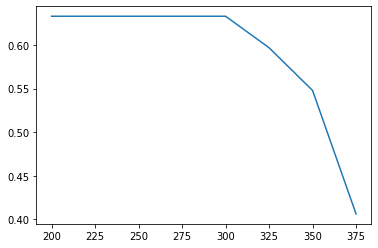

In [45]:
pd.Series(score).plot()

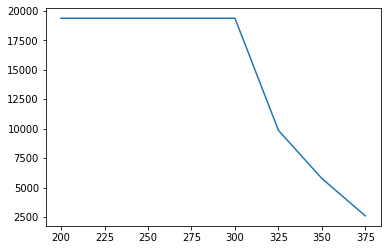

In [46]:
pd.Series(score_c).plot()